# **Tugas OpenCV**
- Nama: M. Fazri Nizar
- NIM: 09021282328053
- Kelas: Pengolahan Citra L1

**1. Install Libraries yang Dibutuhkan**

In [ ]:
%pip install opencv-python
%pip install requests
%pip install numpy

**2. Import Libraries yang Dibutuhkan**

In [2]:
import cv2
from google.colab.patches import cv2_imshow
import requests
import numpy as np

**3. Unduh Citra sebagai Objek untuk Diproses**



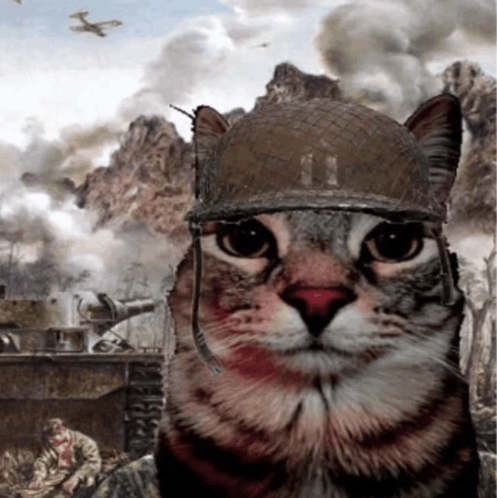

In [3]:
url = 'https://mfazrinizar.com/assets/img/akmal-war.jpg'
response = requests.get(url, stream=True)
response.raise_for_status()

with open('object.jpg', 'wb') as file:
    for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

image = cv2.imread("object.jpg")
cv2_imshow(image)


**4. Operasi Dasar Pengolahan Citra dalam OpenCV**

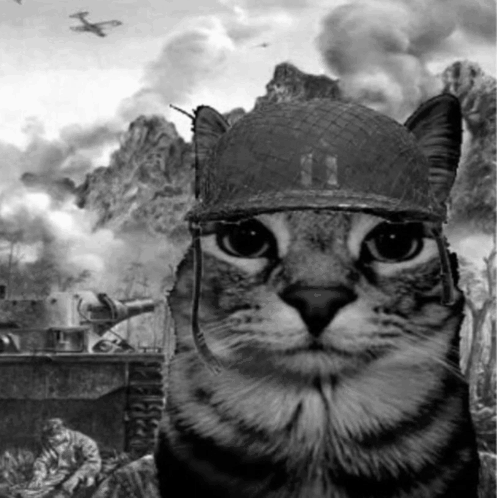

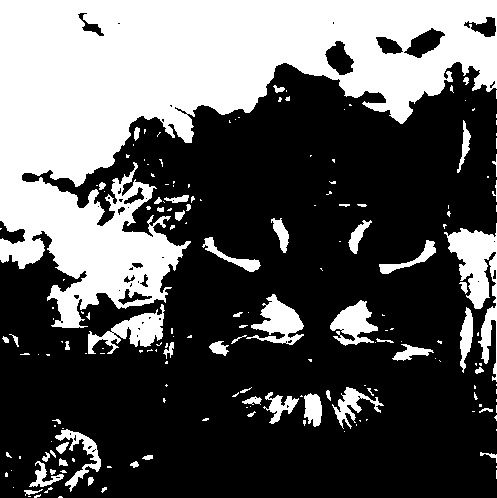

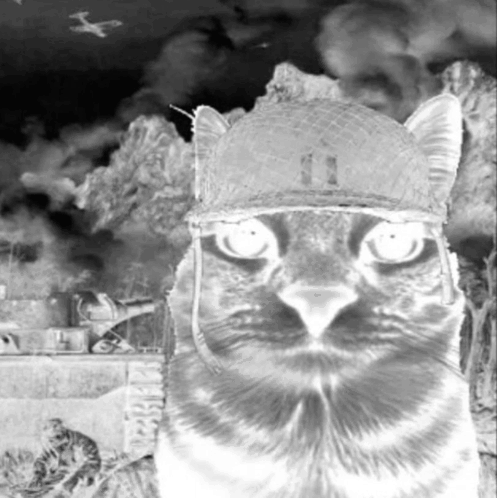

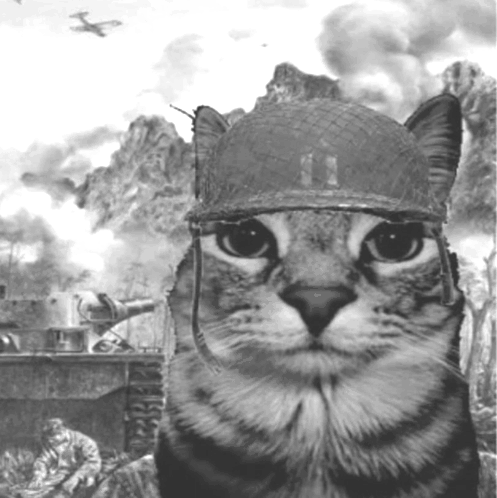

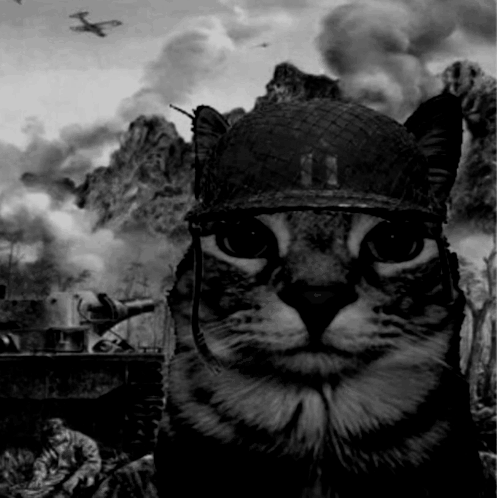

In [4]:
# Konversi citra grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

# Membuat citra biner (thresholding)
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(binary)

# Membuat citra negatif
negative = 255 - gray
cv2_imshow(negative)

# Pencerahan dan peredupan citra
brightened = cv2.add(gray, 50) # Mencerahkan
cv2_imshow(brightened)

darkened = cv2.subtract(gray, 50) # Meredupkan
cv2_imshow(darkened)

**5. Operasi Dasar Geometri dalam Pengolahan Citra Menggunakan OpenCV**

---



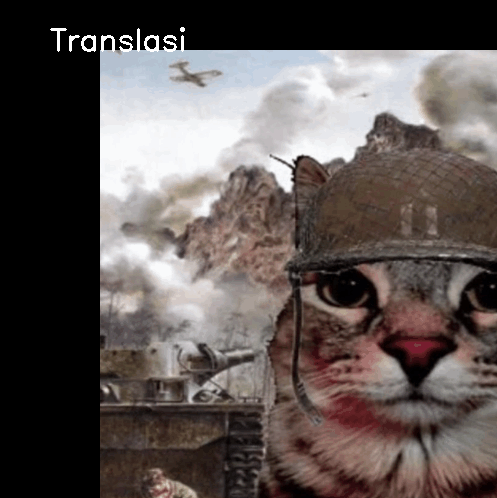

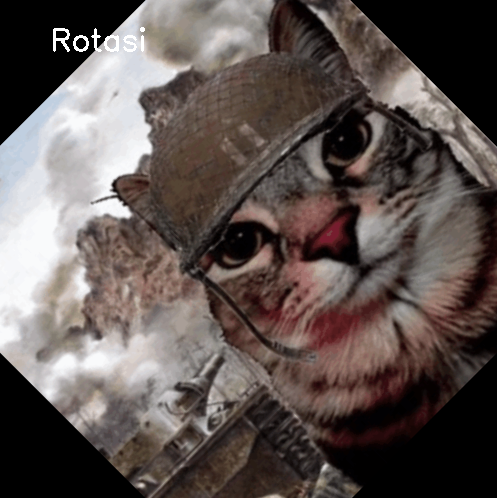

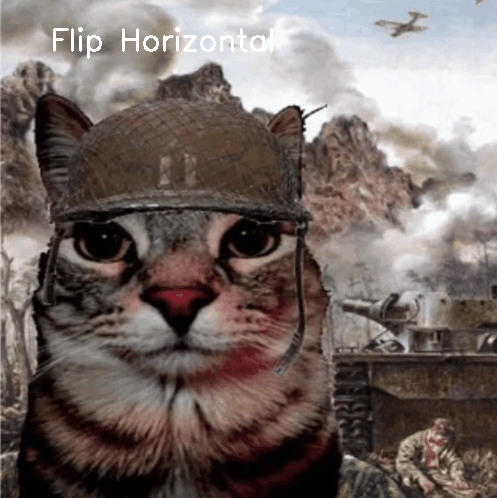

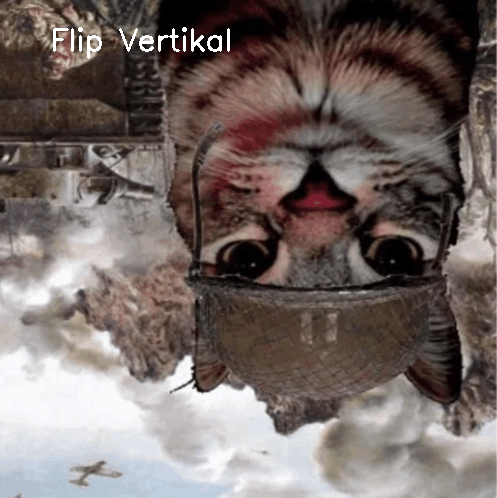

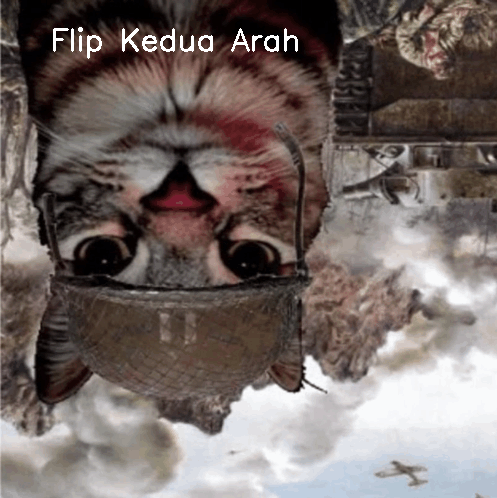

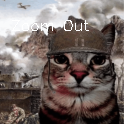

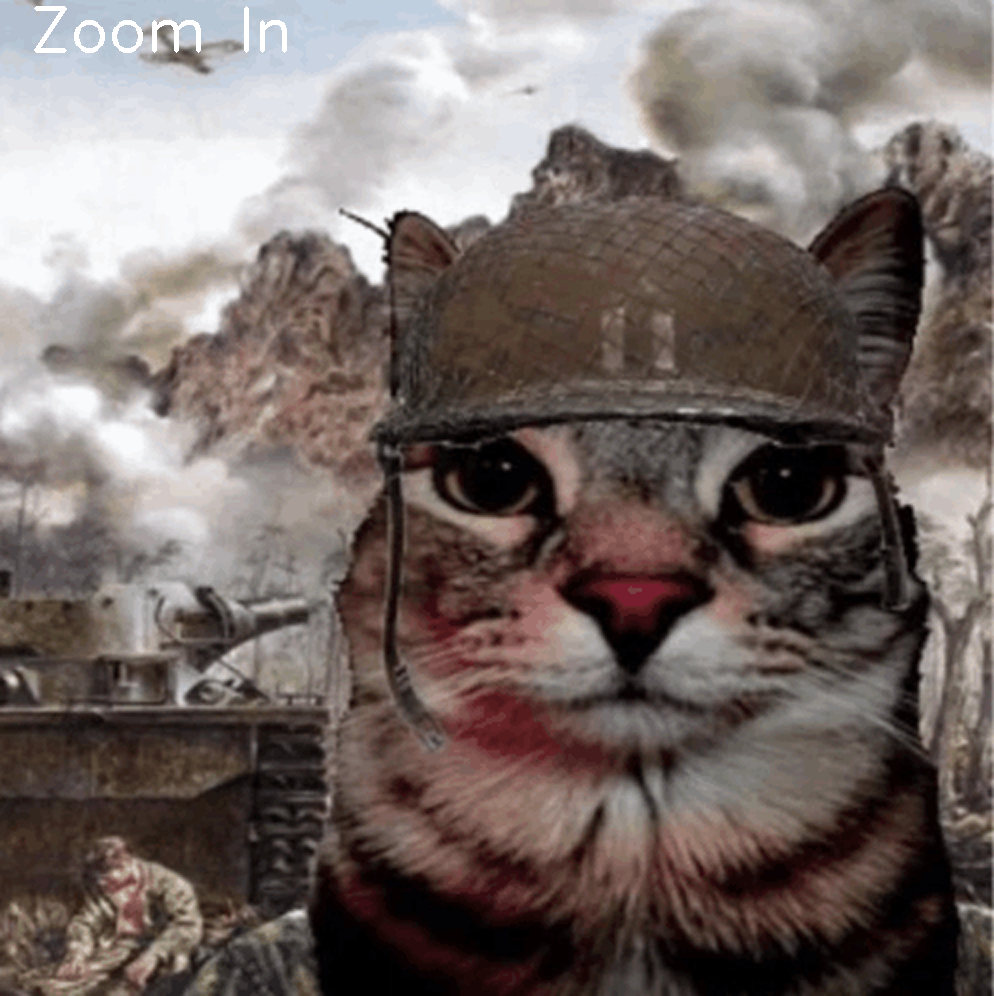

In [8]:
import cv2
import numpy as np

# 1. Translasi
rows, cols = image.shape[:2]  # Mendapatkan jumlah baris dan kolom dari gambar

# Mendefinisikan titik sumber (awal) dan titik tujuan (setelah translasi)
src_pts = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])  # Titik sudut kiri atas, kanan atas, dan kiri bawah
dst_pts = np.float32([[100, 50], [cols - 1 + 100, 50], [100, rows - 1 + 50]])  # Titik setelah translasi (geser ke kanan dan bawah)

M = cv2.getAffineTransform(src_pts, dst_pts)  # Mendapatkan matriks transformasi
translated = cv2.warpAffine(image, M, (cols, rows))  # Menerapkan translasi pada gambar
cv2.putText(translated, "Translasi", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
cv2_imshow(translated)  # Menampilkan gambar yang telah ditranslasi

# 2. Rotasi
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)  # Membuat matriks rotasi dengan sudut 45 derajat searah jarum jam
rotated = cv2.warpAffine(image, M, (cols, rows))  # Menerapkan rotasi pada gambar
cv2.putText(rotated, "Rotasi", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
cv2_imshow(rotated)  # Menampilkan gambar yang telah diputar

# 3. Pembalikan (Flipping)
flipped_horizontal = cv2.flip(image, 1)  # Membalik gambar secara horizontal
cv2.putText(flipped_horizontal, "Flip Horizontal", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
cv2_imshow(flipped_horizontal)  # Menampilkan gambar hasil flipping horizontal

flipped_vertical = cv2.flip(image, 0)  # Membalik gambar secara vertikal
cv2.putText(flipped_vertical, "Flip Vertikal", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
cv2_imshow(flipped_vertical)  # Menampilkan gambar hasil flipping vertikal

flipped_both = cv2.flip(image, -1)  # Membalik gambar secara horizontal dan vertikal
cv2.putText(flipped_both, "Flip Kedua Arah", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
cv2_imshow(flipped_both)  # Menampilkan gambar hasil flipping kedua arah

# 4. Zooming (Scaling)
# Perbedaan antara zoom in dan zoom out:
# - Zoom in: Gambar diperbesar dengan skala > 100%
# - Zoom out: Gambar diperkecil dengan skala < 100%

# Zoom out (diperkecil)
scale_percent_out = 25  # Persentase ukuran dari gambar asli
width_out = int(image.shape[1] * scale_percent_out / 100)
height_out = int(image.shape[0] * scale_percent_out / 100)
dim_out = (width_out, height_out)
resized_out = cv2.resize(image, dim_out, interpolation=cv2.INTER_AREA)  # Interpolasi AREA cocok untuk mengecilkan gambar
cv2.putText(resized_out, "Zoom Out", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
cv2_imshow(resized_out)  # Menampilkan gambar yang telah diperkecil

# Zoom in (diperbesar)
scale_percent_in = 200  # Persentase ukuran lebih besar dari gambar asli
width_in = int(image.shape[1] * scale_percent_in / 100)
height_in = int(image.shape[0] * scale_percent_in / 100)
dim_in = (width_in, height_in)
resized_in = cv2.resize(image, dim_in, interpolation=cv2.INTER_CUBIC)  # Interpolasi CUBIC lebih baik untuk memperbesar gambar
cv2.putText(resized_in, "Zoom In", (30, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)
cv2_imshow(resized_in)  # Menampilkan gambar yang telah diperbesar


____________________________________________________________________

# **Kesimpulan**

## Aktivitas Pengolahan Citra

Aktivitas ini telah berhasil menunjukkan beberapa operasi dasar pengolahan citra menggunakan library OpenCV di Python.  Melalui serangkaian langkah, mulai dari instalasi dan import library yang dibutuhkan, hingga implementasi berbagai operasi, pemahaman mengenai manipulasi citra digital semakin diperjelas.  Beberapa operasi yang diujicobakan mencakup konversi warna, thresholding, inversi warna, penyesuaian kecerahan, dan operasi geometris seperti translasi, rotasi, flipping, dan scaling. Setiap tahapan divisualisasikan untuk memudahkan pemahaman dan observasi perubahan yang terjadi pada citra.

## Poin-poin Penting

* **Instalasi dan Import Library:** Proses instalasi library `opencv-python`, `requests`, dan `numpy` berjalan lancar, memastikan semua dependensi tersedia untuk eksekusi kode. Import library yang diperlukan dilakukan dengan tepat untuk mengakses fungsi-fungsi pengolahan citra.
* **Operasi Dasar:** Operasi dasar seperti konversi ke grayscale, thresholding, dan inversi warna telah diimplementasikan dengan baik.  Hasil operasi ini memberikan gambaran awal mengenai manipulasi intensitas pixel dalam citra. Penyesuaian kecerahan (pencerahan dan peredupan) menunjukkan bagaimana nilai pixel dapat diubah untuk menghasilkan efek visual yang berbeda.
* **Operasi Geometris:** Implementasi operasi geometris, termasuk translasi, rotasi, flipping, dan scaling, memberikan pemahaman mengenai bagaimana mengubah posisi dan dimensi citra. Hasil dari setiap operasi geometri menunjukkan perubahan posisi dan orientasi dari objek dalam citra.
* **Visualisasi:** Penggunaan `cv2_imshow` memungkinkan visualisasi setiap tahapan pengolahan citra.  Hal ini sangat penting untuk memahami efek dari setiap operasi dan memvalidasi hasil yang diperoleh. Dengan visualisasi, kita dapat dengan mudah membandingkan citra asli dengan citra yang telah dimodifikasi.

## Analisis dan Pembelajaran

Penggunaan Google Colab memudahkan proses eksekusi kode dan visualisasi hasil.  Selain tidak memerlukan komputasi komputer fisik (cloud), lingkungan ini menyediakan akses ke library yang dibutuhkan dan kemampuan untuk menampilkan output gambar secara langsung.  Implementasi dari masing-masing operasi pengolahan citra menunjukkan bagaimana perubahan parameter dapat mempengaruhi hasil akhir.

## Saran Perbaikan

Meskipun aktivitas ini berhasil mengimplementasikan operasi-operasi dasar, beberapa poin dapat ditingkatkan di masa mendatang:

* **Penjelasan Lebih Detail:**  Menambahkan penjelasan yang lebih detail untuk setiap operasi pengolahan citra, termasuk parameter yang digunakan dan efek yang ditimbulkan, dapat meningkatkan pemahaman.
* **Eksplorasi Operasi Lanjut:**  Eksplorasi operasi pengolahan citra yang lebih lanjut, seperti filtering, edge detection, dan segmentasi, akan memberikan pemahaman yang lebih komprehensif.
* **Studi Kasus:** Menerapkan operasi-operasi pengolahan citra pada studi kasus nyata dapat meningkatkan pemahaman praktis dan membuka peluang pengembangan proyek yang lebih kompleks.

____________________________________________________________________

# **Latihan**

### 1. Perbedaan Utama RGB dan Grayscale


RGB (Red, Green, Blue) adalah model warna aditif yang merepresentasikan warna sebagai kombinasi dari tiga warna primer cahaya: merah, hijau, dan biru. Setiap piksel dalam citra RGB memiliki tiga nilai yang merepresentasikan intensitas masing-masing warna primer.  Rentang nilai untuk setiap warna biasanya dari 0 hingga 255 (8-bit), sehingga satu piksel dapat memiliki 256 x 256 x 256 = 16,7 juta kemungkinan warna.

Grayscale adalah model warna yang hanya menggunakan satu nilai untuk merepresentasikan intensitas cahaya di setiap piksel.  Nilai ini biasanya berkisar dari 0 hingga 255, di mana 0 mewakili hitam dan 255 mewakili putih. Nilai di antaranya mewakili berbagai tingkat keabuan.  Citra grayscale merupakan citra dengan intensitas warna tunggal tanpa informasi warna.

Perbedaan utamanya adalah:
* **Jumlah informasi warna:** RGB menyimpan informasi warna penuh, sedangkan grayscale hanya menyimpan informasi intensitas.
* **Jumlah channel:** RGB memiliki 3 channel (merah, hijau, biru), grayscale memiliki 1 channel (keabuan).
* **Ukuran file:** Citra RGB umumnya memiliki ukuran file yang lebih besar karena menyimpan lebih banyak data warna.

Contoh: Sebuah piksel merah dalam RGB akan direpresentasikan sebagai (255, 0, 0), sedangkan dalam grayscale mungkin memiliki nilai sekitar 128 tergantung bagaimana konversi dilakukan.


### 2. Perbedaan Grayscale, Biner, dan Negatif


* **Grayscale:** Citra grayscale, seperti yang dijelaskan sebelumnya, merepresentasikan gambar dengan berbagai tingkat keabuan, dari hitam ke putih.
    * **Contoh Kasus Penggunaan:**  Pengolahan citra medis (X-ray, USG), konversi gambar berwarna ke hitam putih untuk mengurangi ukuran file, dasar untuk algoritma pengolahan citra lainnya.

* **Citra Biner:**  Citra biner adalah citra yang hanya memiliki dua warna: hitam dan putih.  Setiap piksel pada citra biner direpresentasikan oleh salah satu dari dua nilai, biasanya 0 (hitam) dan 255 (putih). Citra biner dihasilkan dengan menerapkan *thresholding* pada citra grayscale.  Piksel dengan nilai di bawah threshold akan menjadi hitam, dan piksel dengan nilai di atas threshold akan menjadi putih.
    * **Contoh Kasus Penggunaan:**  Deteksi objek, OCR (Optical Character Recognition), segmentasi citra, pembuatan mask untuk menghilangkan latar belakang.

* **Citra Negatif:** Citra negatif dihasilkan dengan membalikkan intensitas piksel citra grayscale atau RGB.  Dalam grayscale, nilai intensitas setiap piksel dikurangi dari nilai maksimum (biasanya 255).  Pada citra negatif, bagian yang terang menjadi gelap dan sebaliknya.
    * **Contoh Kasus Penggunaan:** Memperjelas detail di area gelap gambar, enhancing fitur dalam citra dengan kontras tinggi, meningkatkan visualisasi detail pada radiografi.


Perbedaannya:
* **Jumlah tingkat keabuan:** Grayscale memiliki banyak tingkat keabuan, biner hanya dua, dan negatif adalah inversi intensitas dari citra asal.
* **Cara Pembuatan:** Grayscale adalah konversi warna, biner menggunakan thresholding, dan negatif dihasilkan dengan pembalikan intensitas.


### 3. Rotasi Citra 90 derajat dan -90 derajat

Secara konseptual:
Memutar gambar 90 derajat searah jarum jam dan kemudian memutarnya kembali -90 derajat (atau 270 derajat searah jarum jam) *seharusnya* mengembalikan gambar ke posisi semula.  Rotasi 90 derajat searah jarum jam setara dengan permutasi baris dan kolom matriks yang direpresentasikan dalam citra dan  transposisi matriks. Melakukan proses kebalikannya harus mengembalikan ke matriks awal.

Secara matematis:
Misalkan matriks gambar awal adalah A. Rotasi 90 derajat searah jarum jam dapat direpresentasikan dengan perkalian matriks rotasi R90:

A_rotated_90 = R90 * A

di mana:
R90 = [[0, -1],
       [1, 0]]

Rotasi -90 derajat (atau 270 derajat searah jarum jam) dapat direpresentasikan dengan perkalian matriks rotasi R-90:

A_rotated_-90 = R-90 * A_rotated_90
A_rotated_-90 = R-90 * (R90 * A)

R-90 = [[0, 1],
        [-1, 0]]

Maka
A_rotated_-90 = (R-90 * R90) * A


Perkalian R-90 dan R90 akan menghasilkan matriks identitas (I).

(R-90 * R90) = [[1,0],[0,1]] = I

Oleh karena itu, A_rotated_-90 = I * A = A.

Jadi, gambar akan kembali ke posisi asalnya.
